# Analysis of Apple Traits

For my project, I decided to look into the traits of apples compared to whether or not they were of good quality. I wanted to see if there were any hidden patterns in the data, and more specifically if there were any combinations of traits that could heavily indicate the quality of an apple.

Partway through this, I realized that there was essentially no metadata, source, or explanation of what any of the data actually corresponded to in the real world. The only hint as to where it came from was that it was "Generously provided by an American agriculture company".

In hindsight, I should have chosen a different dataset, but I still think there's interesting information to be gleamed about this.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [28]:
df = pd.read_csv("../content/apple_quality.csv")
# To display the top 5 rows
df = df.drop_duplicates()
df = df.dropna()
quality = []
acidity = []
for x in df["Quality"]:
  match x:
    case("good"):
      quality.append(1)
    case("bad"):
      quality.append(0)
for x in df["Acidity"]:
  acidity.append(float(x))

df = df.drop("Acidity", axis=1)
df.insert(1,"Acidity",acidity)

print(acidity)

[-0.491590483, -0.722809367, 2.621636473, 0.790723217, 0.501984036, -2.981523169, 2.414170509, -1.470125066, -4.871904758, 2.185607723, -2.810808169, 1.294323927, -2.076113997, 1.724026084, 1.709708209, -1.083620788, -0.558208683, 1.250970347, 2.493781985, -1.37665721, 0.726775672, 2.642948241, 3.184188187, 2.086618541, -1.430429857, -3.846641823, -2.93402889, -2.397691796, -1.158128067, 1.64595436, -3.036919711, -2.636844815, 1.166970737, 5.560108693, 2.300330525, -0.98138767, -1.495112616, -2.478055932, -2.292964433, 2.519346925, 1.071129708, 2.740924761, -1.680924092, 0.184905607, 2.627274158, 1.248791791, -4.454570173, 3.097818375, 0.650677868, 2.865048371, -2.298875523, 1.416983091, 0.85622891, -1.198656978, 0.445840404, 2.287350346, -3.343955801, 2.662547829, -1.473537531, 1.049428799, -2.204610725, -0.58628671, 1.619183695, -0.031126053, -0.936970586, 2.071983608, 0.089512941, 2.769458608, -0.112472887, -3.029392365, -2.044768947, 3.689580857, 1.152768549, 0.528698798, -1.477883

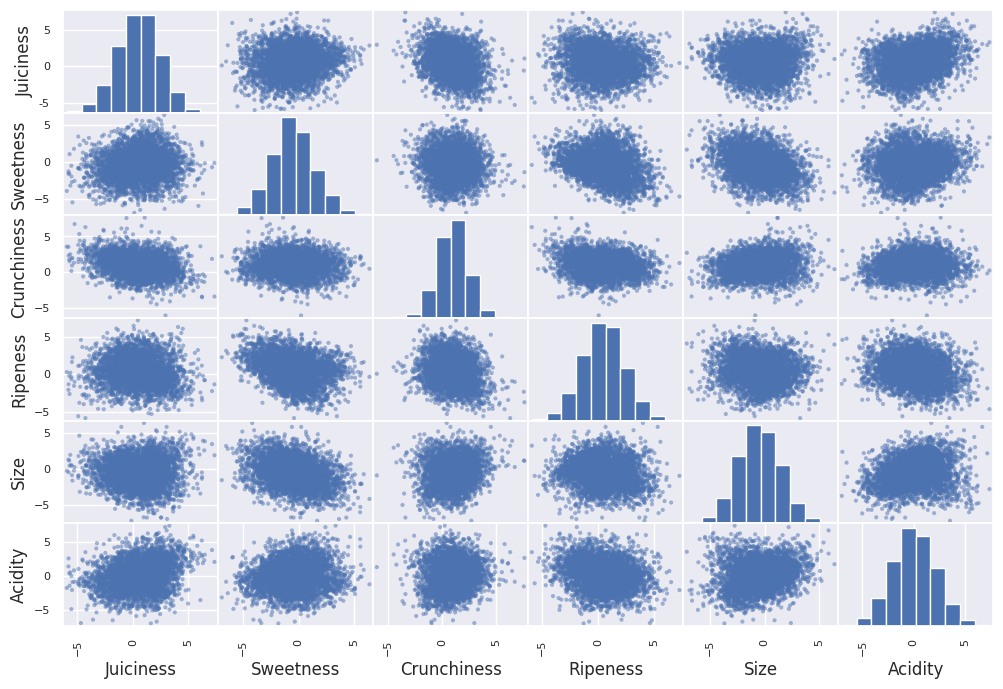

In [39]:
from pandas.plotting import scatter_matrix
attributes = ["Juiciness","Sweetness", "Crunchiness","Ripeness","Size","Acidity"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

First, we'll look at all of the different traits of these apples, and find which of them seem to have some interesting correlations. The most immediately interesting graphs appear to be Ripeness/Sweetness, Size/Acidity,

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


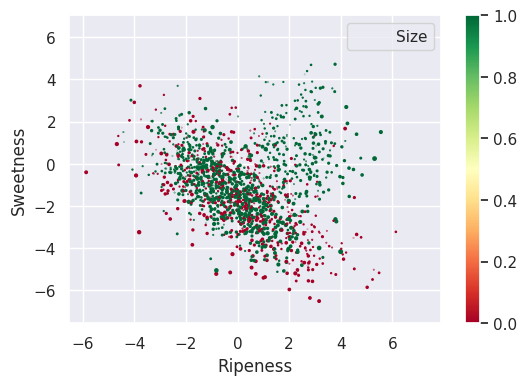

In [41]:
df.plot(kind="scatter", x="Ripeness", y="Sweetness", grid=True,
s=df["Size"], label="Size",
c=quality, cmap="RdYlGn", colorbar=True,
legend=True, sharex=False, figsize=(6,4))
plt.show()

1: Ripeness to sweetness, with coloring based on quality, and dot size based on apple size.

There looks to be two separate groups of apples here.

1. Main-line apples, whose sweetness decreases as it ripens.

2. Apples that are both ripe and sweet, which lean heavily towards good quality.

In the main group, the negative correlation between Ripeness and Sweetness is very significant, the strongest out of anything in the data set. The bad quality apples also seem significantly more sporadic than good quality apples.

In the Ripe/Sweet group, almost all of the apples are of good quality. There is a very heavy correlation between both High Sweetness and High Ripeness, and good quality.


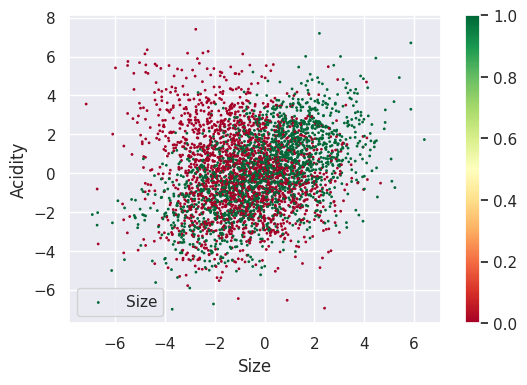

In [40]:
df.plot(kind="scatter", x="Size", y="Acidity", grid=True,
s=1, label="Size",
c=quality, cmap="RdYlGn", colorbar=True,
legend=True, sharex=False, figsize=(6,4))
plt.show()

3: Size vs. Acidity

If you only count the good apples, the graph looks very much like a fairly strong positive correlation between acidity and size, but when you include the bad apples, there appear to be a more sporadic distribution, with a lot of small but very acidic apples. Unripe apples, probably?

If you only include the good apples, there appears to be a positive correlation between size and acidity.

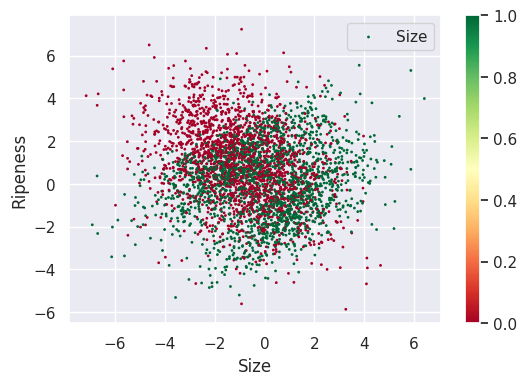

In [47]:
df.plot(kind="scatter", x="Size", y="Ripeness", grid=True,
s=1, label="Size",
c=quality, cmap="RdYlGn", colorbar=True,
legend=True, sharex=False, figsize=(6,4))
plt.show()

Let's examine the good and bad quality apples separately.

The good apples seem to be clustered into two groups: A Smaller and less ripe group, and a Larger and Riper group. Both of these groups have a positive correlation between size and ripeness.

The bad apples don't have very much organization, but apples that are both small and ripe seem to overwhelmingly coincide with bad quality.

4. Linear Regressions
Next, We're going to take a look at all of the different traits, to hopefully find some

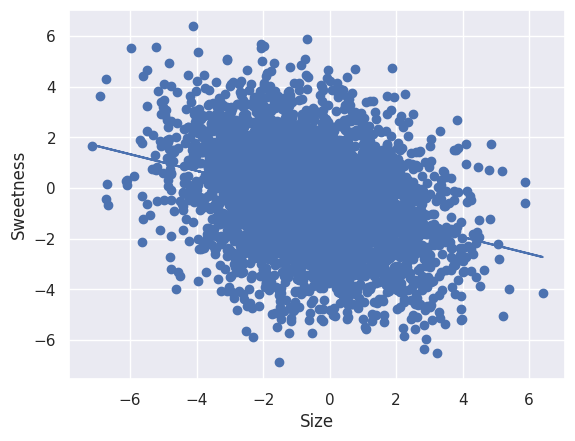

In [38]:
from scipy import stats

x = df["Size"]
y = df["Sweetness"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Size")
plt.ylabel("Sweetness")
plt.show()

Size and Sweetness appear to have a fairly strong inverse relationship, with larger apples being noticeably less sweet.

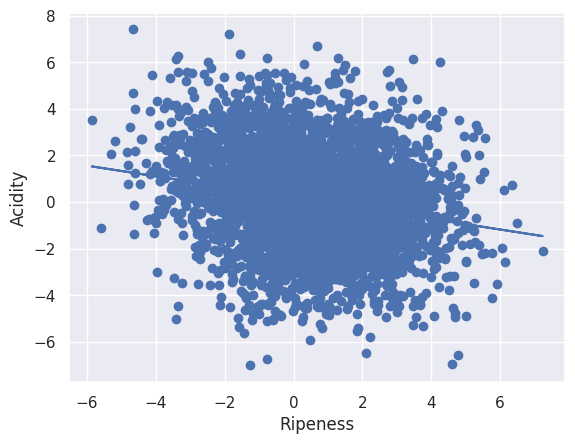

In [ ]:
from scipy import stats

x = df["Ripeness"]
y = df["Acidity"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Ripeness")
plt.ylabel("Acidity")
plt.show()

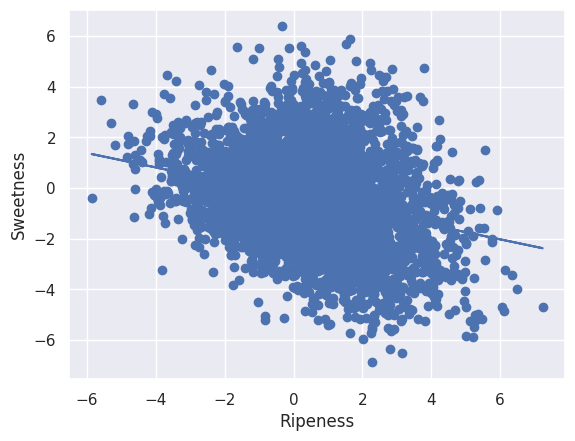

In [ ]:
from scipy import stats

x = df["Ripeness"]
y = df["Sweetness"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.xlabel("Ripeness")
plt.ylabel("Sweetness")
plt.show()

Sweetness tends to fall at the same rate as Acidity as apples get riper. One of these makes sense, as apples tend to become less tart as they ripen, because of the malic acid content decreasing.

However, the Sweetness also decreasing is quite interesting. It's generally true that apples get sweeter when they ripen, and this contradicts that, so either the data or my interpretation of it is wrong, and since there's no real documentation, I have no way of knowing which is which.

Perhaps lower Ripeness corresponds to an older apple? Maybe the Ripeness measurement doesn't account for underripe apples? Probably not, but since there's no explanation of what the numbers mean, aside from the vague impression that they're based on standard deviations, I can't really explain this.

Tartness is known to significantly decrease with Ripeness, and thus I would have expected a significantly lower slope for the Ripeness/Acidity graph, but I can see that being due to Tartness and Acidity not being the same thing.

Tartness and Sweetness are also traditionally played against each other,


In conclusion, I've found that there are several traits in apples that correspond to quality, and with each-other.

- Small and Unsweet apples tend to be of bad quality
- Ripe and Sweet apples tend to be of good quality.
- Small and Ripe apples tend to be of bad quality.
- Riper apples are generally less sweet. (Dataset error?)
- Among good apples, larger apples are more acidic.